# **Tarea: Regresión lineal con SKLEARN**
# Realizamos una regresión lineal para tratar de predecir el tiempo que obtendrá el ganador de la carrera de 100 metros planos masculino en los Juegos Olímpicos de 2016, utilizando los tiempos históricos de los ganadores.

Nuestro objetivo es utilizar la regresión lineal (uno de los modelos más simples que podríamos usar) para demostrar todo el proceso de Machine Learning: definir un modelo, optimizar los parámetros de ese modelo a partir de los datos (aprendizaje) y luego evaluar el rendimiento del modelo.

Comenzamos cargando los datos de la base de datos Olympic de la URL (https://raw.githubusercontent.com/sdrogers/fcmlcode/master/notebooks/data/olympic100m.txt) . A continuación seleccione los correspondientes a los hombres en la categoría de 100 metros. Luego copiar las columnas primera y segunda en las variables numpy $x$ y $y$.

In [1]:
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

data = urllib.request.urlretrieve('https://raw.githubusercontent.com/sdrogers/fcmlcode/master/notebooks/data/olympic100m.txt', 'olympic100m.txt')

data = np.loadtxt('olympic100m.txt',delimiter=',')

x = data[:,0][:,None] #Años
y = data[:,1][:,None] #Tiempos

#print('A continuación se muestra el Vector Columna de los Años:')
#print(x)
#print('######################################################################')
#print('A continuación se muestra el Vector Columna de los Tiempos:')
#print(y)

# 1.- Visualización de los datos
Siempre es útil comenzar con una gráfica de los datos. Puede utilizar *matplotlib* para visualizar los datos.

Tenga en cuenta utilizar el comando mágico *%matplotlib inline*  que le dice al Jupyter Notebook que renderice las celdas en el navegador y que no las archive.

Text(0.5, 1.0, 'Tiempos de los 100 metros planos')

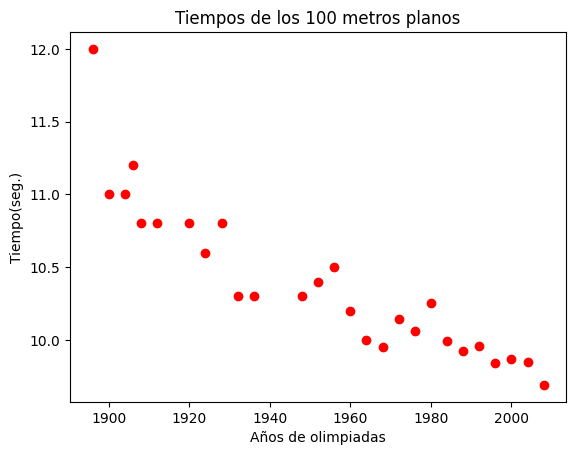

In [2]:
#Gráfica de los datos
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(x,y,'ro') #Grafica los datos extraídos de los Años VS los Tiempos
plt.xlabel('Años de olimpiadas')
plt.ylabel('Tiempo(seg.)')
plt.title('Tiempos de los 100 metros planos')

# Lineal


[[11.14109659]
 [11.08777305]
 [11.03444951]
 [11.00778774]
 [10.98112597]
 [10.92780242]
 [10.82115534]
 [10.76783179]
 [10.71450825]
 [10.66118471]
 [10.60786117]
 [10.44789054]
 [10.39456699]
 [10.34124345]
 [10.28791991]
 [10.23459637]
 [10.18127282]
 [10.12794928]
 [10.07462574]
 [10.02130219]
 [ 9.96797865]
 [ 9.91465511]
 [ 9.86133157]
 [ 9.80800802]
 [ 9.75468448]
 [ 9.70136094]
 [ 9.64803739]]
######################################################################
0.050307110475657967
[[2018]]
######################################################################
La estimación del dato de prueba es: [[9.51472854]]
El error cuadrático de prueba es: 0.08137980715460867


Text(0.5, 1.0, 'Tiempos de los 100 metros planos')

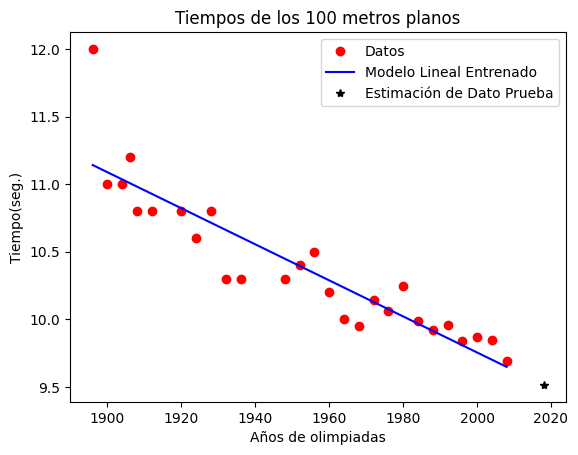

In [6]:
#*********************************** Lineal ***********************************
from sklearn.linear_model import LinearRegression #Función del SKLearn
                                              #para hacer la Regresión Lineal
import sklearn
from sklearn.metrics import r2_score

model = LinearRegression() #La variable "model" será el modelo. / a + bx

#*****************************************************************************
# ******************************* ENTRENAMIENTO ******************************

model = model.fit(x,y) #Entreno el modelo / obtengo pesos /
#Ajusto los datos al modelo a=3.64164559e+01 y b=-1.33308857e-02
# 3.6416 + -1.3330x

#Primer Predict
y_hat = model.predict(x) #Xe * W
print(y_hat)
print('######################################################################')

#************ Error por MSE y r2score para el Entrenamiento *******************
#Error_train_r2_score = sklearn.metrics.r2_score(y, y_hat)
Error_train_mse = sklearn.metrics.mean_squared_error(y, y_hat)
#print(Error_train_r2_score)
print(Error_train_mse)

#******************************************************************************
#************************************ PRUEBA **********************************

x_new = np.array([np.array([2018])]) #Dato de prueba 2018
print(x_new)
print('######################################################################')

#Segundo Predict
y_new = model.predict(x_new)
print('La estimación del dato de prueba es: '+ str(y_new))

y_real = np.array([np.array([9.8])])

#****************** Error por MSE y r2score para el Prueba ********************
#Error_test_r2_score = sklearn.metrics.r2_score(y, y_hat)
Error_test_mse = sklearn.metrics.mean_squared_error(y_real, y_new)
#print(Error_train_r2_score)
print('El error cuadrático de prueba es: '+ str(Error_test_mse))

fig = plt.figure()
plt.plot(x,y,'ro',label='Datos') #Puntos rojos
plt.plot(x,y_hat,'b',label='Modelo Lineal Entrenado') #Línea azul
plt.plot(x_new,y_new,'*k',label='Estimación de Dato Prueba')
plt.legend()
plt.xlabel('Años de olimpiadas')
plt.ylabel('Tiempo(seg.)')
plt.title('Tiempos de los 100 metros planos')

## Polinómica


[[1.00000000e+00 1.89600000e+03 3.59481600e+06 6.81577114e+09]
 [1.00000000e+00 1.90000000e+03 3.61000000e+06 6.85900000e+09]
 [1.00000000e+00 1.90400000e+03 3.62521600e+06 6.90241126e+09]
 [1.00000000e+00 1.90600000e+03 3.63283600e+06 6.92418542e+09]
 [1.00000000e+00 1.90800000e+03 3.64046400e+06 6.94600531e+09]
 [1.00000000e+00 1.91200000e+03 3.65574400e+06 6.98978253e+09]
 [1.00000000e+00 1.92000000e+03 3.68640000e+06 7.07788800e+09]
 [1.00000000e+00 1.92400000e+03 3.70177600e+06 7.12221702e+09]
 [1.00000000e+00 1.92800000e+03 3.71718400e+06 7.16673075e+09]
 [1.00000000e+00 1.93200000e+03 3.73262400e+06 7.21142957e+09]
 [1.00000000e+00 1.93600000e+03 3.74809600e+06 7.25631386e+09]
 [1.00000000e+00 1.94800000e+03 3.79470400e+06 7.39208339e+09]
 [1.00000000e+00 1.95200000e+03 3.81030400e+06 7.43771341e+09]
 [1.00000000e+00 1.95600000e+03 3.82593600e+06 7.48353082e+09]
 [1.00000000e+00 1.96000000e+03 3.84160000e+06 7.52953600e+09]
 [1.00000000e+00 1.96400000e+03 3.85729600e+06 7.575729

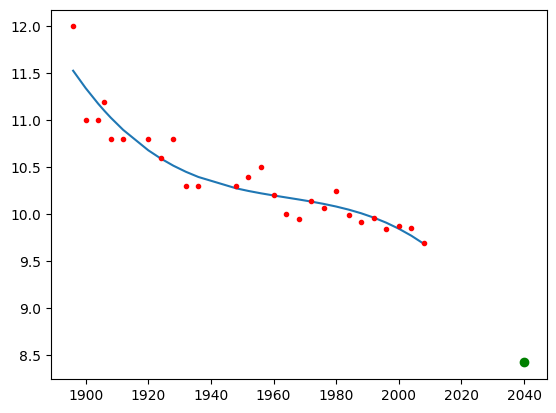

In [7]:
# Polinómica
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
poly = poly.fit(x,y) #PRIUMER FIT
x_e = poly.transform(x)
print(x_e)



print('######################################################################')
model_poly = model.fit(x_e,y) #SEUGNOD FIT

#Primer Predict
y_hat = model_poly.predict(x_e)
print(y_hat)
print('######################################################################')



x_new = np.array([np.array([2040])])
xe = poly.transform(x_new) #Es para extender, agregar el valor 1.
#[1 n_new] sino que es [1 x_new1 x_new2 x_new_3]
#Segundo Predict
y_new = model_poly.predict(xe)

print('######################################################################')

plt.plot(x,y_hat)
plt.plot(x,y,'r.')
plt.plot(x_new,y_new,'go')